# **Concepts Covered:**

- <a href = #link1>Binomial Distribution</a>
- <a href = #link2>Continuous Uniform Distribution</a>
- <a href = #link3>Normal Distribution</a>





# <a name='link1'>**Binomial Distribution**</a>

## Problem statement 
80% of all the visitors to Lavista Museum end up buying souvenirs from the souvenir shop at the Museum. On the coming Sunday, if a random sample of 10 visitors is picked:

 1. Find the probability that every visitor will end up buying from the souvenir shop
 2. Find the probability that a maximum of 7 visitors will buy souvenirs from the souvenir shop

Let's check first whether we satisfy the assumptions of the binomial distribution.
*  There are only two possible outcomes (success or failure) for each trial – A visitor will buy souvenirs from the souvenir shop or not (yes or no).
* Number of trials (n) is fixed - There are 10 visitors in the sample.
* Each trial is independent of the other trials - It is reasonable to assume that the buying activity of visitors is independent.
* The probability of success (p) is the same for each trial - The probability of success for each visitor is 0.8.

### Let's import the libraries 

In [1]:
# import the important packages
import pandas as pd  # library used for data manipulation and analysis
import numpy as np  # library used for working with arrays
import matplotlib.pyplot as plt  # library for plots and visualizations
import seaborn as sns  # library for visualizations

%matplotlib inline

import scipy.stats as stats  # this library contains a large number of probability distributions as well as a growing library of statistical functions

### Let's estimate the probability distribution of visitors

In [2]:
# declare the sample size in variable n which represents the number of visitors selected randomly
n = 10

In [3]:
# declare p which represents the probability of success, i.e., the probability that a visitor will end up buying a souvenir
p = 0.80

In [4]:
# declare different possible number of visitors selected in a numpy array
k = np.arange(0,11)
k

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

The probability function of Binomial Distribution provides the probability for  x  number of successes from n trials where  p is the probability of success   

>$P(X=x)= {n\choose x}p^x(1-p)^{n-x}$


Here, we know that:

* n ( number of visitors selected randomly ) = 10
* p ( probability of success i.e., the probability that a visitor will end up buying a souvenir) = 0.80
* q ( probability of failure i.e., the probability that a visitor will not end up buying a souvenir) = 1 - 0.80 = 0.20
* x ( number of successes ) = 10


We will use binom.pmf() to calculate this probability function which provides the probability for the number of visitors (out of n=10) that will end up buying souvenirs from the souvenir shop.

In [5]:
# import the required function
from scipy.stats import binom

# use the binom.pmf() function to generate the probability distribution
binomial = binom.pmf(k=k, n=n, p=p)

In [6]:
binomial

array([1.02400000e-07, 4.09600000e-06, 7.37280000e-05, 7.86432000e-04,
       5.50502400e-03, 2.64241152e-02, 8.80803840e-02, 2.01326592e-01,
       3.01989888e-01, 2.68435456e-01, 1.07374182e-01])

As you can see **binomial** is the array of probabilities for different number of successes. Let us visualize the same in the following plot.

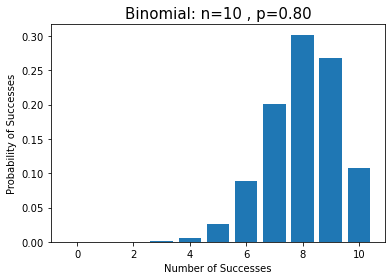

In [7]:
# plot the distribution
plt.bar(k, binomial) # make a bar plot
plt.title("Binomial: n=%i , p=%.2f" % (n, p), fontsize=15) # set the title
plt.xlabel("Number of Successes") # set the x-axis label
plt.ylabel("Probability of Successes") # set the y-axis label
plt.show() # display the plot

The last element of this **binomial** array represents the probability when the number of successes is 10 (which means that all 10 visitors (out of 10 selected randomly) will buy souvenirs from the souvenir shop)

In [8]:
binomial[10]

0.10737418240000006

The above probability shows that the probability of exactly 10 successes is  ~ 0.11.

Now, we are interested in knowing the probability of at most 7 successes which means what is the probability that out of 10 randomly selected visitors, a maximum of 7 visitors will buy souvenirs from the souvenir shop.

Here, we need to calculate the probability for P(X<=7). CDF is used to calculate the cumulative probability.



**CDF:** of a Random variable (X) is the probability that X  will take the value less than or equal to x. It can be represented mathematically as below.

>$F_X(x) = P(X\leq x)$

In our case, Random Variable (X) is the number of visitors who will buy souvenirs from the souvenir shop.

$P(X\leq 7)$


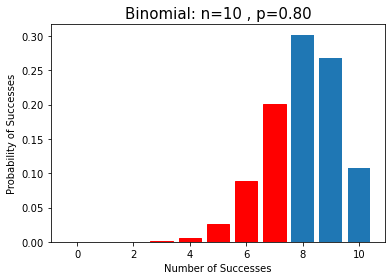

In [9]:
# plot the probability distribution
# We are plotting the distributions here to better visualize the calculations.
# Of course you do not 'need' to create the following visualization to answer the question above.
# You can directly use the cdf function for probability calculations.
barl = plt.bar(k, binomial) # make a bar plot
plt.title("Binomial: n=%i , p=%.2f" % (n, p), fontsize=15) # set the title
plt.xlabel("Number of Successes") # set the x-axis label
plt.ylabel("Probability of Successes") # set the y-axis label
for i in range(0, 8):
    barl[i].set_color("r") # color the bars in red where number of successes is less than 8
plt.show() # display the plot

In the above graph, the red region represents P(X<=7).
Let's calculate the probability that out of 10 randomly selected visitors, a maximum of 7 will buy souvenirs from the souvenir shop. We will use binom.cdf() for this.

In [10]:
# calculate cdf
binom.cdf(k=7, n=n, p=p)

0.32220047359999987

### Conclusion: 

There is a 10.74% chance that every visitor will end up buying souvenirs from the souvenir shop.

There is q 32.22% chance that a maximum of 7 visitors out of 10 will buy souvenirs from the souvenir shop.

Let's try to change the probability of success (probability that each visitor will buy souvenirs from the souvenir shop) to different values like 60%,70%,90%,95% and visualize how the shape of the distribution changes.

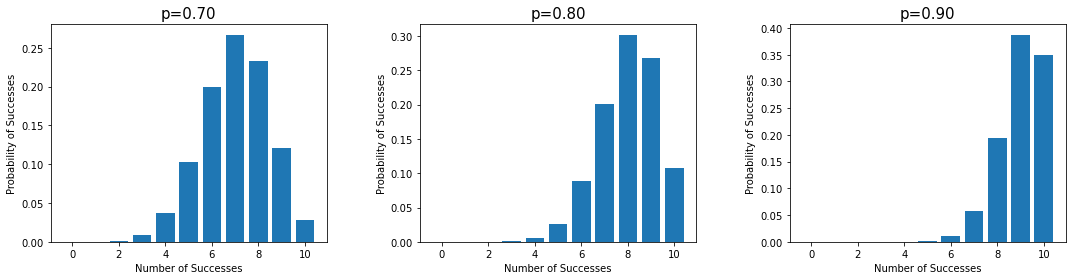

In [11]:
plt.figure(figsize=(15, 4))

plt.subplot(131)
binomial_70 = binom.pmf(k, n, p=0.7)

# plot the distribution of the same
plt.bar(k, binomial_70)
plt.title("p=%.2f" % (0.7), fontsize=15)
plt.xlabel("Number of Successes")
plt.ylabel("Probability of Successes")

plt.subplot(132)
binomial_80 = binom.pmf(k, n, p=0.8)

# plot the distribution of the same
plt.bar(k, binomial_80)
plt.title("p=%.2f" % (0.8), fontsize=15)
plt.xlabel("Number of Successes")
plt.ylabel("Probability of Successes")

plt.subplot(133)
binomial_90 = binom.pmf(k, n, p=0.9)

# plot the distribution of the same
plt.bar(k, binomial_90)
plt.title("p=%.2f" % (0.9), fontsize=15)
plt.xlabel("Number of Successes")
plt.ylabel("Probability of Successes")

plt.tight_layout(w_pad=5)

### Conclusion:

It is clear from the above plot that the shape of the distribution changes as the value of p (probability of success) changes.